# 관람객 토큰화 & 워드 클라우드

In [1]:
import re
from collections import Counter

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
from konlpy.tag import Okt
from wordcloud import WordCloud

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 전처리 파일 불러오기

In [2]:
file = 'C:/coding/multicampus/프로젝트_주간_3조/범죄도시2_네이버영화_관람객리뷰.csv'
encoding='utf8'
rev = pd.read_csv(file, encoding=encoding)
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27343 entries, 0 to 27342
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  27343 non-null  int64 
 1   ratings     27343 non-null  int64 
 2   reviews     25414 non-null  object
dtypes: int64(2), object(1)
memory usage: 641.0+ KB


In [3]:
rev.head()

,Unnamed: 0,ratings,reviews
0,0,10,이 영화의 속편은 100% 성공이다. 원래 한국영화들 속편은 잘 안되고 속편 나오면...
1,1,10,시리즈로 계속 나왔으면 좋겠다. 마동석한테 최적화된 작품이다.
2,2,8,니가 강해상이냐? 아뇨. 구씬데요?
3,3,10,전편을 보고 가야 장이수 얼굴만 봐도 웃음이 나오는 이유를 알 수 있습니다:)
4,4,9,와…. 손석구 연기 진짜 미쳣다…오바하는 범죄자연기가 아니라 ㄹㅇ 범죄자같음


## 전처리 함수

In [8]:
#토큰화
def token_konlpy(text):
    okt=Okt()
    words=[]
    for word in okt.nouns(text):
        if not word == ('손' or '석' or '강') :
            if len(word)>1 :
                words.append(word)
        else:
            words.append(word)
    return words

#데이터 전처리
def review_preproces_ko(data, stop_words): 
    line_text = re.sub(r"[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]", " ", str(data)) # 한글 외 특수문자 제거
    words=token_konlpy(line_text)   # 토큰화 
    words = [w for w in words if not w in stop_words] #불용어 제거
    return words

#워드클라우드 실행
def wordcloud(data):
    cloud = WordCloud(font_path = 'NanumGothic.ttf', background_color="white",
                      width=800, height=600).generate_from_frequencies(data) 
    plt.figure(figsize=(15,10))
    plt.imshow(cloud)
    plt.axis('off')
    plt.show() 

In [5]:
# 불용어처리
f = open('c:/coding/multicampus/datas/한글 불용어.txt', 'r', encoding='utf8')
stop_words = f.read().splitlines()
pop_word = ['영화', '진짜', '역시', '그냥', '최고', '보기', '정말', '역시', '보고', '포함', '이후'
            , '스포일러', '편도', '영화관', '정도', '편이', '장면', '느낌', '사람', '처음', '자체'
            , '이수', '내내', '계속', '간만', '때문', '하나', '조금', '완전', '무조건', '만큼']
[stop_words.append(stop) for stop in pop_word]
print(len(stop_words))

709


## 실행코드

In [9]:
results =[]
for line in rev['reviews']: #전체 데이터 전처리
    result = review_preproces_ko(line, stop_words)
    results.append(result)

#1차원 리스트로 축소
data = np.concatenate(results).tolist()

# 단어빈도수 추가
view_num = 100
count = Counter(data)
word = dict(count.most_common(view_num)) 

print(word)

{'마동석': 4553, '손': 3459, '연기': 3365, '액션': 3184, '배우': 2266, '범죄': 2234, '감상': 2212, '도시': 2075, '스토리': 1237, '재미': 1100, '장첸': 970, '기대': 962, '생각': 911, '중간': 821, '코믹': 705, '웃음': 679, '마블리': 664, '시리즈': 632, '악역': 604, '격감': 591, '속편': 589, '해상': 577, '빌런': 538, '대박': 503, '스트레스': 502, '추천': 493, '연출': 480, '캐릭터': 479, '전편': 477, '포인트': 460, '극장': 408, '연기력': 406, '요소': 398, '개인': 397, '천만': 394, '유머': 392, '매력': 391, '한국': 380, '긴장감': 378, '한번': 373, '존잼': 372, '코로나': 371, '개그': 371, '시즌': 365, '전작': 357, '형사': 356, '몰입': 345, '관람': 345, '꿀잼': 341, '부분': 338, '킬링타임': 322, '웃기': 318, '다시': 318, '평점': 295, '강추': 284, '주먹': 280, '오락': 279, '아주': 276, '한국영': 265, '소리': 260, '사랑': 255, '장르': 254, '대사': 247, '전개': 246, '내용': 243, '석도': 241, '후회': 238, '관객': 237, '걱정': 234, '별로': 234, '누가': 232, '구의': 230, '이건': 228, '마지막': 228, '사운드': 221, '펀치': 221, '편의': 215, '작품': 212, '코미디': 211, '개꿀잼': 209, '모든': 206, '이형': 204, '히어로': 199, '악당': 197, '조연': 191, '사이다': 190, '감독': 188, '코드': 186, '제

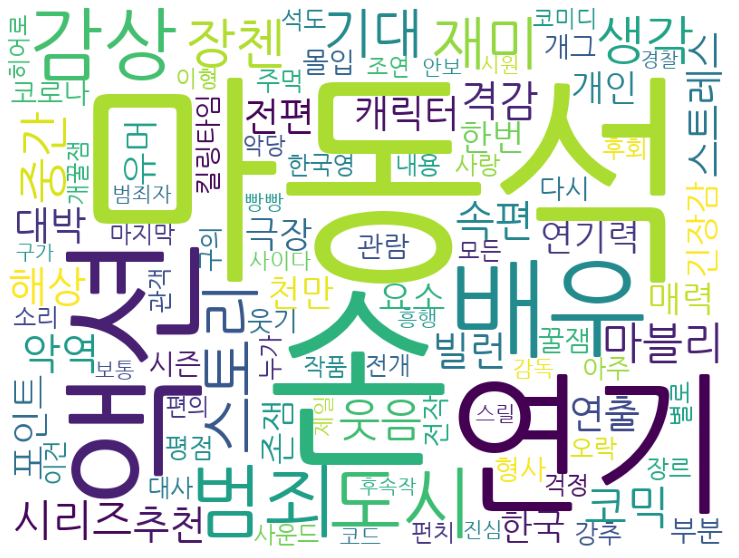

In [10]:
wordcloud(word)

# 전문가 텍스트전처리&워드클라우드

In [11]:
file = 'C:/coding/multicampus/프로젝트_주간_3조/범죄도시2_네이버영화_전문가리뷰.csv'
encoding='utf8'
rev = pd.read_csv(file, encoding=encoding)
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9 non-null      int64 
 1   point       9 non-null      int64 
 2   review      9 non-null      object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes


In [12]:
results =[]
for line in rev['review']: #전체 데이터 전처리
    result = review_preproces_ko(line, stop_words)
    results.append(result)

#1차원 리스트로 축소
data = np.concatenate(results).tolist()

# 단어빈도수 추가
view_num = 100
count = Counter(data)
word = dict(count.most_common(view_num)) 

print(word)

{'마동석': 9, '형사': 6, '액션': 5, '캐릭터': 5, '시리즈': 4, '범죄': 4, '도시': 4, '정의': 3, '손': 3, '그것': 3, '군더더기': 2, '히어로': 2, '절절': 2, '집중': 2, '구현': 2, '매력': 2, '활약': 2, '존재': 2, '관객': 2, '슈퍼히어로': 2, '장첸': 2, '주인공': 2, '악당': 2, '전편': 2, '주먹': 2, '시네마': 2, '유니버스': 2, '물이': 1, '악인': 1, '사연': 1, '설명': 1, '거나': 1, '부패': 1, '사이': 1, '한국': 1, '우지': 1, '영웅': 1, '극악': 1, '빌런': 1, '서로': 1, '시종일관': 1, '오락': 1, '로서': 1, '기능': 1, '수행': 1, '격감': 1, '증명': 1, '구사': 1, '설정': 1, '거리': 1, '음성': 1, '무표정': 1, '주위': 1, '해상': 1, '구의': 1, '대중': 1, '마음': 1, '메커니즘': 1, '현재': 1, '시대정신': 1, '러닝': 1, '타임': 1, '누군가': 1, '현실': 1, '쾌감': 1, '여느': 1, '배우': 1, '지위': 1, '부여': 1, '속편': 1, '가족사': 1, '싱글': 1, '로맨스': 1, '사족': 1, '첨가': 1, '범인': 1, '검거': 1, '직진': 1, '선택': 1, '부담': 1, '초반': 1, '살짝': 1, '헛스윙': 1, '후반': 1, '부로': 1, '갈수록': 1, '유머': 1, '무르익으': 1, '만회': 1, '편의': 1, '구멍': 1, '위성락': 1, '양태': 1, '부재': 1, '절대': 1, '통해': 1, '무기': 1, '흉기': 1, '안위': 1, '걱정': 1}


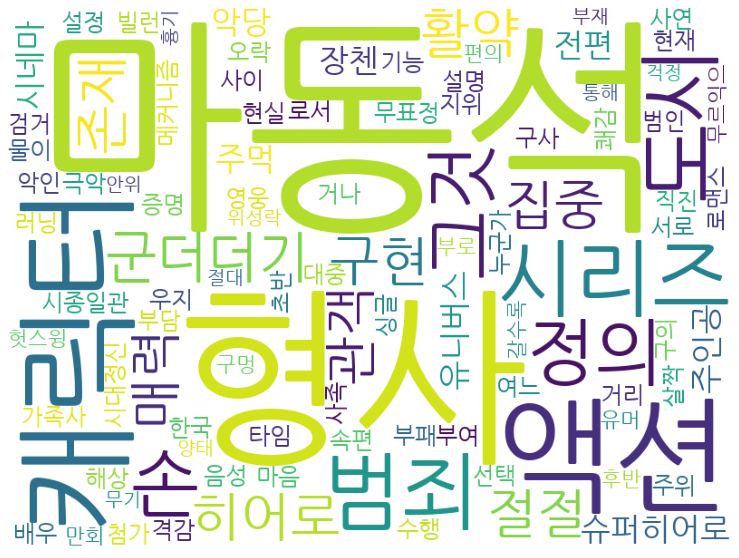

In [13]:
wordcloud(word)